In [ ]:
from getpass import getpass
user = getpass('Username: ') # Access my github
password = getpass('Password: ')

In [ ]:
!git clone https://github.com/hainguyentado/recsys-xmrec-team10
!pip install --quiet pytrec-eval
#!pip install --quiet optuna

Cloning into 'recsys-xmrec-team10'...
remote: Enumerating objects: 699, done.
remote: Counting objects: 100% (699/699), done.
remote: Compressing objects: 100% (630/630), done.
remote: Total 699 (delta 400), reused 234 (delta 66), pack-reused 0
Receiving objects: 100% (699/699), 176.05 MiB | 17.50 MiB/s, done.
Resolving deltas: 100% (400/400), done.
Checking out files: 100% (67/67), done.


In [ ]:
!git pull # Reload github repo for update. Do not run this cell.

In [ ]:
%cd /content/recsys-xmrec-team10
import argparse
import pandas as pd
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, ConcatDataset

import os
from os import path
import json
import sys
import pickle
from zipfile import ZipFile
from copy import deepcopy

sys.path.insert(1, 'src')
from model import Model
from utils import *
from data import *
from train_baseline import *

/content/recsys-xmrec-team10


In [ ]:
#GPU checking
!nvidia-smi --query-gpu=gpu_name,driver_version,memory.total --format=csv
    

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
parser = create_arg_parser()
args = parser.parse_args(['--cuda'])
args.alias = 'nmf'

args.tgt_market = 't1' 
args.src_markets = 's2-s3-t2' # 'none' | 's1' | 's1_s2_s3'
args.use_qrel = False
args.tgt_market_valid = f'DATA/{args.tgt_market}/valid_run.tsv'
args.tgt_market_test = f'DATA/{args.tgt_market}/test_run.tsv'
args.exp_name = 'nmfnouse'
args.fastmode = True
#args.pretrain = f'checkpoints/{args.tgt_market}_{args.src_markets}_{args.exp_name}.model'
args.train_data_file = 'train_5core.tsv'
args.num_negative = 20
args.batch_size = 1024
args.latent_dim = 24
args.latent_dim_mlp = 16
args.mlp_layers = (32, 32, 24, 16)
args.sample_func = lambda:random.uniform(0,0.3)
args.optimizer = 'adam'
args.lr = 0.01
args.num_epoch = 20
args.l2_reg = 1e-7
args.seed = 73
if torch.cuda.is_available() and args.cuda:
    torch.cuda.set_device(0)
args.device = torch.device('cuda' if torch.cuda.is_available() and args.cuda else 'cpu')
print("Device:", args.device)

Device: cpu


In [ ]:
print(args)
build(args)

Namespace(alias='nmf', batch_size=1024, cuda=True, data_dir='DATA/', device=device(type='cpu'), exp_name='nmfnouse', fastmode=True, freeze_bottom=False, idbank_pretrain=None, l2_reg=1e-07, latent_dim=24, latent_dim_mlp=16, lr=0.01, mlp_layers=(32, 32, 24, 16), num_epoch=20, num_negative=20, optimizer='adam', pretrain=None, sample_func=<function <lambda> at 0x7f1144facef0>, seed=73, src_markets='s2-s3-t2', tgt_market='t1', tgt_market_test='DATA/t1/test_run.tsv', tgt_market_valid='DATA/t1/valid_run.tsv', train_data_file='train_5core.tsv', use_qrel=False, **{' fastmode': True})
Running experiment on device: cpu
Loading target market t1: DATA/t1/train_5core.tsv
Loaded target data!

Loading s2: DATA/s2/train_5core.tsv
Loading s3: DATA/s3/train_5core.tsv
Loading t2: DATA/t2/train_5core.tsv
Loaded source data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(18617, 24)
  (gmf_embedding_item): Embedding(5002, 24)
  (mlp_embedding_user): Embedding(18617, 16)
  (mlp_embedding_item): Embeddi

0.5331277340322347

In [ ]:
build(args)

Running experiment on device: cpu
Loading target market t2: DATA/t2/train_5core.tsv
Loaded target data!

Loading s1: DATA/s1/train_5core.tsv
Loading s2: DATA/s2/train_5core.tsv
Loading s3: DATA/s3/train_5core.tsv
Loaded source data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(22386, 25)
  (gmf_embedding_item): Embedding(12018, 25)
  (mlp_embedding_user): Embedding(22386, 16)
  (mlp_embedding_item): Embedding(12018, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=24, bias=True)
    (2): Linear(in_features=24, out_features=16, bias=True)
  )
  (affine_output): Linear(in_features=41, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Epoch 0 starts !
Total Train Loss:  0.027008440432019824  Time:  1406.9993834495544
Total Valid Loss:  0.45118370381268585  Time:  0.058357954025268555
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train

KeyboardInterrupt: ignored

In [ ]:
score = []
for ix, latent in enumerate([8, 10, 13, 16, 19, 22, 25, 27, 31, 33]):
  score.append([])
  for nega in [8, 12, 16, 20, 24, 28, 32, 36]:
    args.latent_dim = latent
    args.num_negative = nega
    ndcg = build(args)
    print(latent, ' dimensions and ', nega, ' negative samples.')
    score[ix].append(ndcg)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Total Train Loss:  0.022204547246533108  Time:  7.499578475952148
Total Valid Loss:  0.33528001109759015  Time:  0.022343873977661133
--------------------------------------------------------------------------------
Epoch 8 starts !
Total Train Loss:  0.022010700550661393  Time:  7.611766338348389
Total Valid Loss:  0.3455105572938919  Time:  0.027460813522338867
--------------------------------------------------------------------------------
Epoch 9 starts !
Total Train Loss:  0.02187706760202762  Time:  7.332003831863403
Total Valid Loss:  0.33643212417761487  Time:  0.022779464721679688
--------------------------------------------------------------------------------
Epoch 10 starts !
Total Train Loss:  0.021683520209705282  Time:  7.337714672088623
Total Valid Loss:  0.3293946335713069  Time:  0.028812885284423828
--------------------------------------------------------------------------------
Epoch 11 starts !
Total Train Loss

In [ ]:
for i in score: ## do not delete this
  for j in i:
    print(round(j, 4), end = ' ')
  print('\n')

0.503 0.5286 0.5428 0.5439 0.5438 0.5444 0.5296 0.5227 

0.5149 0.5469 0.5558 0.5589 0.5594 0.5562 0.5408 0.5441 

0.538 0.5562 0.5744 0.5792 0.5788 0.5716 0.5701 0.5698 

0.5474 0.5717 0.5763 0.5807 0.5866 0.5838 0.5799 0.5771 

0.5525 0.5773 0.5926 0.5917 0.588 0.5943 0.5832 0.5829 

0.5541 0.5843 0.5968 0.5999 0.5971 0.6014 0.5908 0.5871 

0.5574 0.5867 0.5969 0.5934 0.5953 0.6056 0.5949 0.5873 

0.5609 0.578 0.5999 0.6011 0.6024 0.5941 0.5945 0.5968 

0.5665 0.5843 0.5956 0.599 0.5996 0.6026 0.5966 0.5906 

0.5707 0.5862 0.5938 0.5975 0.5976 0.6034 0.6002 0.5926 



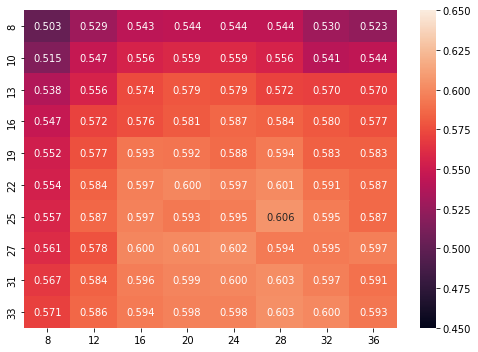

In [ ]:
score = [[0.503, 0.5286, 0.5428, 0.5439, 0.5438, 0.5444, 0.5296, 0.5227], 
        [0.5149, 0.5469, 0.5558, 0.5589, 0.5594, 0.5562, 0.5408, 0.5441], 
        [0.538, 0.5562, 0.5744, 0.5792, 0.5788, 0.5716, 0.5701, 0.5698], 
        [0.5474, 0.5717, 0.5763, 0.5807, 0.5866, 0.5838, 0.5799, 0.5771], 
        [0.5525, 0.5773, 0.5926, 0.5917, 0.588, 0.5943, 0.5832, 0.5829],
        [0.5541, 0.5843, 0.5968, 0.5999, 0.5971, 0.6014, 0.5908, 0.5871], 
        [0.5574, 0.5867, 0.5969, 0.5934, 0.5953, 0.6056, 0.5949, 0.5873],
        [0.5609, 0.578, 0.5999, 0.6011, 0.6024, 0.5941, 0.5945, 0.5968],
        [0.5665, 0.5843, 0.5956, 0.599, 0.5996, 0.6026, 0.5966, 0.5906], 
        [0.5707, 0.5862, 0.5938, 0.5975, 0.5976, 0.6034, 0.6002, 0.5926]] 
latent = [8, 10, 13, 16, 19, 22, 25, 27, 31, 33]
nega = [8, 12, 16, 20, 24, 28, 32, 36]
import pandas as pd
a = pd.DataFrame(score)
a.columns = nega
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

plt.xlabel('Negative samplings')
plt.ylabel('latent embedding dimensions')
sns.heatmap(a, vmin = 0.45,vmax=0.65,annot=True, fmt='.3f', yticklabels=latent)
plt.tight_layout()
plt.savefig('tune_latent_negative.png')


In [ ]:
args2 = deepcopy(args)
model_dir = f'checkpoints/{args2.tgt_market}_{args2.src_markets}_{args2.exp_name}.model'
id_bank_dir = f'checkpoints/{args2.tgt_market}_{args2.src_markets}_{args2.exp_name}.pickle'

with open(id_bank_dir, 'rb') as centralid_file:
    my_id_bank, args0 = pickle.load(centralid_file)

mymodel = Model(args0, my_id_bank)
mymodel.load(model_dir)

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(2698, 12)
  (gmf_embedding_item): Embedding(1386, 12)
  (mlp_embedding_user): Embedding(2698, 16)
  (mlp_embedding_item): Embedding(1386, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=24, bias=True)
    (2): Linear(in_features=24, out_features=16, bias=True)
  )
  (affine_output): Linear(in_features=28, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Pretrained weights from checkpoints/t1_none_nmfnobias.model are loaded!


In [ ]:
args.alias = 'mlp'
score2 = []
for ix, layers in enumerate([[16, 64, 32, 16, 8], [16, 32, 32, 16, 8], [32, 64, 32, 16], [32, 32, 24, 16], [40, 64, 40, 20], [50, 80, 60, 40, 25]]):
  args.mlp_layers = layers
  args.latent_dim_mlp = int(layers[0]/2)
  ndcg = build(args)
  print(layers, ' for mlp_layers config.')
  score2.append(ndcg)

Running experiment on device: cuda
Loading target market t1: DATA/t1/train_5core.tsv
Loaded target data!

Model is MLP!
MLP(
  (embedding_user): Embedding(2698, 8)
  (embedding_item): Embedding(1386, 8)
  (fc_layers): ModuleList(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): Linear(in_features=16, out_features=8, bias=True)
  )
  (affine_output): Linear(in_features=8, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Epoch 0 starts !
Total Train Loss:  0.03175367436996673  Time:  10.906706094741821
Total Valid Loss:  0.5362028976281484  Time:  0.027019977569580078
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.029860376129104357  Time:  11.020322561264038
Total Valid Loss:  0.5145049492518107  Time:  0.029403209686279297
---------------------------------------------------

In [ ]:
for i in score2: ## do not delete this  
  print(round(i, 4), end = ' ')
!pip install --quiet beautifultable
from beautifultable import BeautifulTable
tb = BeautifulTable()
layers = ['[16, 64, 32, 16, 8]', '[16, 32, 32, 16, 8]', '[32, 64, 32, 16]', '[32, 32, 24, 16]', '[40, 64, 40, 20]', '[50, 80, 60, 40, 25]']
tb.column_headers = ['MLP layers', 'NDCG']
for i in range(6):
  tb.append_row([layers[i], score2[i]])
tb.column_widths = 25
print(tb)

0.4799 0.4725 0.4951 0.5128 0.4884 0.4932 +-------------------------+-------------------------+
|       MLP layers        |          NDCG           |
+-------------------------+-------------------------+
|   [16, 64, 32, 16, 8]   |          0.48           |
+-------------------------+-------------------------+
|   [16, 32, 32, 16, 8]   |          0.473          |
+-------------------------+-------------------------+
|    [32, 64, 32, 16]     |          0.495          |
+-------------------------+-------------------------+
|    [32, 32, 24, 16]     |          0.513          |
+-------------------------+-------------------------+
|    [40, 64, 40, 20]     |          0.488          |
+-------------------------+-------------------------+
|  [50, 80, 60, 40, 25]   |          0.493          |
+-------------------------+-------------------------+


/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_widths' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.width' instead.
  warnings.warn(message, FutureWarning)


In [ ]:
#args2 = deepcopy(args)
args2.tgt_market = 't2'
args2.src_markets = 'none'
args2.use_qrel = True
#args2.pretrain = None
args2.pretrain = f'checkpoints/{args2.tgt_market}_{args2.src_markets}_{args2.exp_name}.model'
args2.tgt_market_valid = f'DATA/{args2.tgt_market}/valid_run.tsv'
args2.tgt_market_test = f'DATA/{args2.tgt_market}/test_run.tsv'
args2.num_negative = 10
args2.batch_size = 1024
args2.num_epoch = 10
args2.fastmode = False
build(args2)

Running experiment on device: cpu
Loading target market t2: DATA/t2/train_5core.tsv
Loaded target data!

Model is NMF!
NMF(
  (gmf_embedding_user): Embedding(5483, 12)
  (gmf_embedding_item): Embedding(2963, 12)
  (mlp_embedding_user): Embedding(5483, 16)
  (mlp_embedding_item): Embedding(2963, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=24, bias=True)
    (2): Linear(in_features=24, out_features=16, bias=True)
  )
  (affine_output): Linear(in_features=28, out_features=1, bias=True)
  (logistic): Sigmoid()
)
Pretrained weights from checkpoints/t2_none_nmfnobias.model are loaded!
Epoch 0 starts !
Total Train Loss:  0.036569613046944144  Time:  18.950298309326172
Total Valid Loss:  0.27162910997867584  Time:  0.03895139694213867
--------------------------------------------------------------------------------
Epoch 1 starts !
Total Train Loss:  0.03322019682824612  Time:  18.28661799430847
Total Va

0.8333102680558637

In [ ]:
# Zip the run files into a single archive to prepare for submission 
run_dir = f'./baseline_outputs/{args.exp_name}/'   
! cd {run_dir} && zip -r ../sample_run.zip ./

print("*** Validating the submission Zip file ***")
# Run the validate_submission.py script to check if the file format is okay and get the performance on validation set.
! python validate_submission.py ./baseline_outputs/sample_run.zip

updating: t2/ (stored 0%)
updating: t2/test_pred.tsv (deflated 67%)
updating: t2/valid_pred.tsv (deflated 67%)
updating: t1/ (stored 0%)
updating: t1/valid_pred.tsv (deflated 67%)
updating: t1/test_pred.tsv (deflated 67%)
*** Validating the submission Zip file ***
Extracting the submission zip file
Validating the file structure of the submission
File structure validation successfully passed
Evaluating the validation set
===================== Market : t1=====================
======= Set val : score(ndcg10_val)=0.810746563150 =======
======= Set val : score(r10_val)=0.906933629959 =======
===================== Market : t2=====================
======= Set val : score(ndcg10_val)=0.733347846970 =======
======= Set val : score(r10_val)=0.863735862824 =======
===================== Market : t1t2=====================
======= Set val : score(ndcg10_val)=0.758869834687 =======
======= Set val : score(r10_val)=0.877980193178 =======


In [ ]:
df = pd.read_csv(os.path.join('baseline_outputs', args.exp_name, args.tgt_market, 'test_pred.tsv'), sep='\t')
df.head()

,userId,itemId,score
0,t1U1007418,P1026077,2.999990
1,t1U1007418,P1006891,2.999943
2,t1U1007418,P1011354,2.999666
3,t1U1007418,P1032538,2.999614
4,t1U1007418,P1006282,2.994421


In [ ]:
rl = pd.read_csv('DATA/t1/valid_qrel.tsv', sep='\t')
rl['rating'] = rl['rating'].astype(float)
df52 = pd.read_csv('DATA/t2/train_5core.tsv',sep='\t')
df51 = pd.read_csv('DATA/t1/train_5core.tsv',sep='\t')
df51.userId = df51['userId'].apply(lambda x: 't2' + x[2:])
def load_market_valid_run(valid_run_file):
        users, items, ratings = [], [], []
        with open(valid_run_file, 'r') as f:
            for line in f:
                linetoks = line.split('\t')
                user_id = linetoks[0]
                item_ids = linetoks[1].strip().split(',')
                for cindex, item_id in enumerate(item_ids):
                    users.append(user_id)
                    items.append(item_id)
                    ratings.append(float(1))
        rn = pd.DataFrame(zip(users, items, ratings),columns=('userId','itemId','rating'))
        return rn
vrn = load_market_valid_run('DATA/t1/valid_run.tsv')
trn = load_market_valid_run('DATA/t1/test_run.tsv')

In [ ]:
len(df51.itemId), len(rl.itemId),len(pd.concat([df51.itemId, rl.itemId]).drop_duplicates())

(19615, 2697, 1376)